<a href="https://colab.research.google.com/github/lucaskydelima/Optimization-with-Python-Pyomo/blob/main/S4Example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pyomo

In [3]:
import os
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

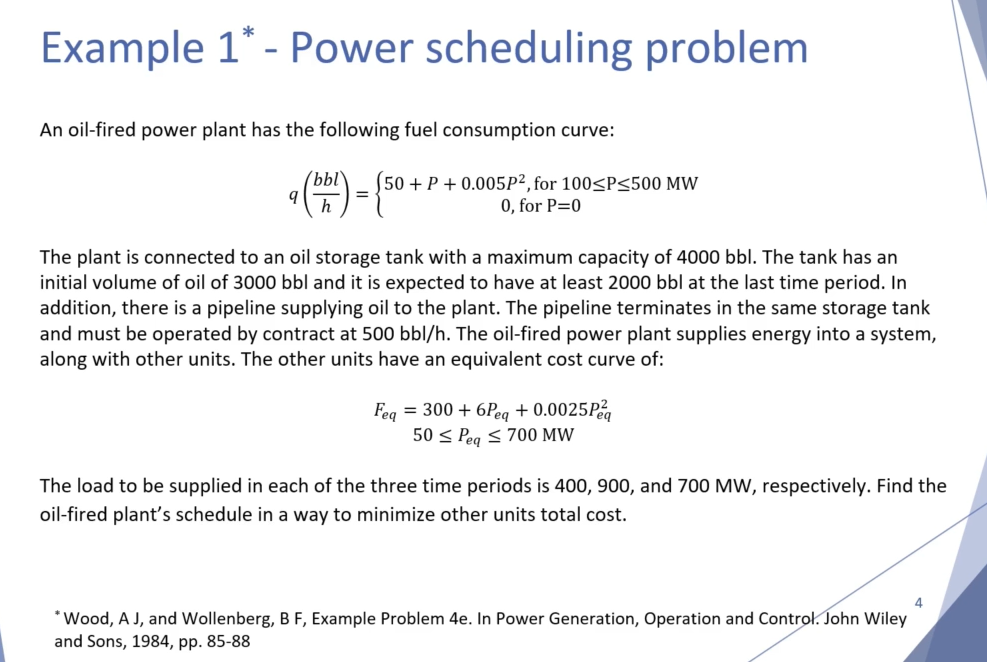

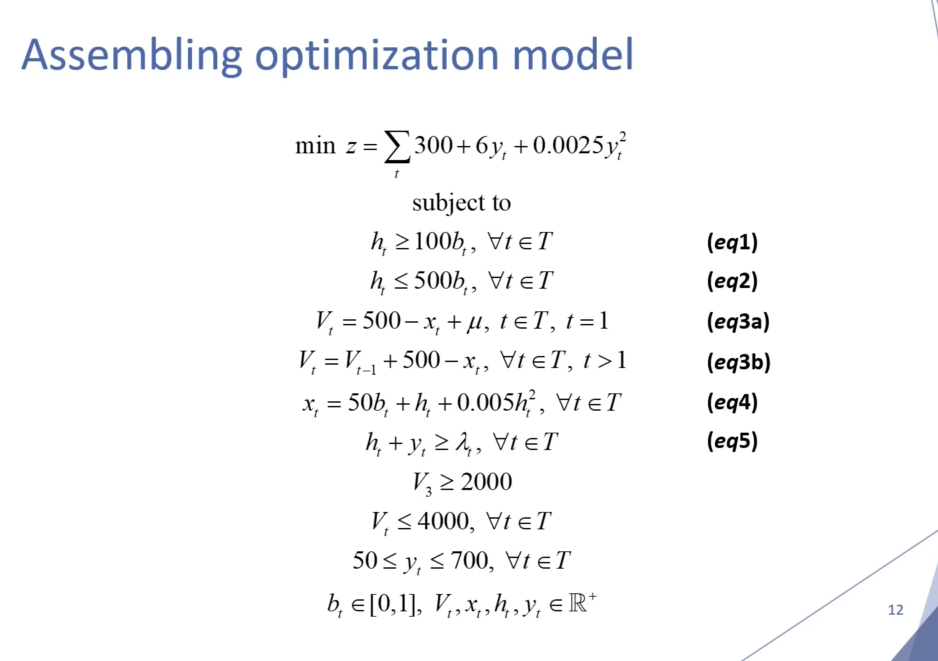

In [13]:
# Defining the model
model = pyo.ConcreteModel()

# Set
model.t = pyo.RangeSet(3)

# Params
model.lam = pyo.Param(model.t, initialize={1:400, 2:900, 3:700})
model.mu = pyo.Param(initialize=3000)

# Decision Variables
model.x = pyo.Var(model.t, domain=pyo.NonNegativeReals)
model.h = pyo.Var(model.t, domain=pyo.NonNegativeReals)
model.y = pyo.Var(model.t, domain=pyo.NonNegativeReals, bounds=(50,700))
model.v = pyo.Var(model.t, domain=pyo.NonNegativeReals, bounds=(0,4000))
model.b = pyo.Var(model.t, domain=pyo.Binary)

# Constraints
def rule1(model, t):
  return model.h[t] >= 100*model.b[t]
model.const1 = pyo.Constraint(model.t, rule=rule1)

def rule2(model, t):
  return model.h[t] <= 500*model.b[t]
model.const2 = pyo.Constraint(model.t, rule=rule2)

def rule3(model, t):
  if t > 1:
    return model.v[t] == model.v[t-1] + 500 - model.x[t]
  return model.v[t] == 500 - model.x[t] + model.mu
model.const3 = pyo.Constraint(model.t, rule=rule3)

def rule4(model, t):
  return model.x[t] == 50*model.b[t] + model.h[t] + 0.005*(model.h[t]**2)
model.const4 = pyo.Constraint(model.t, rule=rule4)

def rule5(model, t):
  return model.h[t] + model.y[t] >= model.lam[t]
model.const5 = pyo.Constraint(model.t, rule=rule5)

def rule6(model, t):
  return model.v[3] >= 2000
model.const6 = pyo.Constraint(rule=rule6)

# Objective function
def Objective_rule(model):
  return sum(300 + 6*model.y[t] + 0.0025*(model.y[t]**2) for t in model.t)
model.obj = pyo.Objective(rule=Objective_rule, sense=pyo.minimize)

# Solve - minlp
os.environ['NEOS_EMAIL'] = 'lucaskydelima@gmail.com'
results = pyo.SolverManagerFactory('neos').solve(model, opt='minlp')

results.write()
print('\nRESULTS')
print('Total cost =', model.obj())

for t in model.t:
  print('\nStatus of operation of oil-based generation unit in period', t,'=', model.b[t]())

for t in model.t:
  print('\nVolume of oil in storage tank in period', t,'=', model.v[t](),'bbl')

for t in model.t:
  print('\nOil consumption in period', t,'=', model.x[t]())

for t in model.t:
  print('\nPower generated by other units in period', t,'=', model.y[t]())

for t in model.t:
  print('\nPower generated by oil-based generation unit in period', t,'=', model.h[t]())

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 16
  Number of variables: 15
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: MINLP-B&B (20100607)\x3a Optimal solution found; 7 subproblems, objective = 8566.118961687665; Evals\x3a obj = 31, constr = 47, grad = 47, Hes = 49
  Termination condition: optimal
  Id: 0
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
